In [133]:
import pandas as pd
import pyodbc
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hard_rej_equifax202111_sep1.csv', sep=';')

In [4]:
df['num'].nunique()

123657

In [3]:
ucdb_id  = pd.read_csv('ucdb_date.csv', sep=';')

In [122]:
ucdb_id.head()

,ucdb_id,createdate
0,1068357920,2020-10-31
1,1068358726,2020-10-31
2,1068359077,2020-10-31
3,1068359462,2020-10-31
4,1068359566,2020-10-31


In [7]:
ucdb_id['ucdb_id'].nunique()

109756

In [4]:
ucdb_id['createdate'] = pd.to_datetime(ucdb_id['createdate'])
df['cred_date'] = pd.to_datetime(df['cred_date'])

In [31]:
df =  df.merge(ucdb_id, how='right',left_on='num', right_on='ucdb_id')

In [32]:
df = df.query('cred_date>=createdate')
df = df.drop(columns='Unnamed: 0')

In [123]:
df.head()

,num,cred_date,cred_enddate,cred_first_load,cred_id,cred_sum,ta_cred_sum_paid,cred_sum_debt,cred_sum_type,cred_active,cred_active_date,cred_type,cred_update,cred_sum_overdue,cred_day_overdue,cred_max_overdue,ucdb_id,createdate
14,1.068360e+09,2020-10-31,04.12.2020,04.12.2020,3.189984e+09,6000.0,6000.00,0.00,0.0,0.0,03.12.2020,19.0,2020-04-12,0.0,0.0,0.0,1068359568,2020-10-31
16,1.068360e+09,2021-03-30,11.05.2021,02.04.2021,2.109407e+18,9138.0,2379.00,9134.46,0.0,1.0,30.03.2021,19.0,2021-04-27,0.0,0.0,0.0,1068359568,2020-10-31
35,1.068360e+09,2020-11-25,16.12.2020,25.11.2020,3.188117e+09,12000.0,15321.00,0.00,0.0,0.0,23.12.2020,19.0,2020-12-23,0.0,0.0,0.0,1068359928,2020-10-31
36,1.068360e+09,2020-11-25,25.12.2020,26.11.2020,3.188298e+09,13500.0,17692.37,0.00,0.0,0.0,26.12.2020,19.0,2020-12-27,0.0,0.0,0.0,1068359928,2020-10-31
37,1.068360e+09,2020-11-25,30.12.2020,25.11.2020,3.188339e+09,11000.0,14850.00,0.00,0.0,0.0,30.12.2020,19.0,2020-12-30,0.0,0.0,0.0,1068359928,2020-10-31


df3 = pd.pivot_table(df2,values=['ta_cred_sum_paid','cred_sum_debt'], index=['ucdb_id']
                   , aggfunc=np.sum).reset_index()
df4=df3.query('cred_sum_debt<ta_cred_sum_paid')
df4list=df4['ucdb_id'].tolist()
df5 = df2[df2['ucdb_id'].isin(df4list)]
df5.to_excel("output1.xlsx")  

---------------

In [35]:
df[['cred_update']] = df[['cred_update']].apply(pd.to_datetime)


In [36]:
df = df[df['cred_date'] > (df['cred_update'] - datetime.timedelta(days=90))]

In [37]:
df = df[df['cred_day_overdue']<30] 

In [46]:
cred_type = [4,5,19,18,20]

In [47]:
df = df[df['cred_type'].isin(cred_type)]
df

,num,cred_date,cred_enddate,cred_first_load,cred_id,cred_sum,ta_cred_sum_paid,cred_sum_debt,cred_sum_type,cred_active,cred_active_date,cred_type,cred_update,cred_sum_overdue,cred_day_overdue,cred_max_overdue,ucdb_id,createdate
14,1.068360e+09,2020-10-31,04.12.2020,04.12.2020,3.189984e+09,6000.00,6000.00,0.00,0.0,0.0,03.12.2020,19.0,2020-04-12,0.0,0.0,0.0,1068359568,2020-10-31
16,1.068360e+09,2021-03-30,11.05.2021,02.04.2021,2.109407e+18,9138.00,2379.00,9134.46,0.0,1.0,30.03.2021,19.0,2021-04-27,0.0,0.0,0.0,1068359568,2020-10-31
35,1.068360e+09,2020-11-25,16.12.2020,25.11.2020,3.188117e+09,12000.00,15321.00,0.00,0.0,0.0,23.12.2020,19.0,2020-12-23,0.0,0.0,0.0,1068359928,2020-10-31
36,1.068360e+09,2020-11-25,25.12.2020,26.11.2020,3.188298e+09,13500.00,17692.37,0.00,0.0,0.0,26.12.2020,19.0,2020-12-27,0.0,0.0,0.0,1068359928,2020-10-31
37,1.068360e+09,2020-11-25,30.12.2020,25.11.2020,3.188339e+09,11000.00,14850.00,0.00,0.0,0.0,30.12.2020,19.0,2020-12-30,0.0,0.0,0.0,1068359928,2020-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524996,1.079033e+09,2021-04-22,19.10.2021,23.04.2021,2.111308e+18,1666.66,0.00,1666.66,0.0,1.0,22.04.2021,19.0,2021-04-23,0.0,0.0,0.0,1079032643,2021-04-22
525021,1.079034e+09,2021-04-23,16.07.2021,23.04.2021,2.111622e+18,3000.00,0.00,3000.00,0.0,1.0,23.04.2021,19.0,2021-04-23,0.0,0.0,0.0,1079034181,2021-04-22
525028,1.079034e+09,2021-04-26,26.05.2021,26.04.2021,2.111704e+18,4000.00,0.00,4000.00,0.0,1.0,26.04.2021,19.0,2021-04-26,0.0,0.0,0.0,1079034238,2021-04-22
525029,1.079034e+09,2021-04-26,26.05.2021,26.04.2021,2.111906e+18,3000.00,0.00,3000.00,0.0,1.0,26.04.2021,19.0,2021-04-26,0.0,0.0,0.0,1079034238,2021-04-22


In [45]:
df['num'].nunique()

19772

In [58]:
good_ucdb_id=df['num'].unique().tolist()

In [124]:
df3 = pd.DataFrame(good_ucdb_id, columns=['ucdb_id_good'])
df3 = df3.astype(int)
df3 = df3.astype(str)
df3['good'] = 1
df3.head()

,ucdb_id_good,good
0,1068359568,1
1,1068359928,1
2,1068366607,1
3,1068368391,1
4,1068368504,1


In [63]:
    conn = pyodbc.connect('Driver={SQL Server};'
                                  'Server=mck-p-dwh;'
                                  'Database=master;'
                                  'Trusted_Connection=True;')
    df2 =  pd.read_sql("""
    select a.* from dwh_fire_window.reports.ucdb_id_hard_rej t
    join dss.[spr].[funnel_tmp5] a
    on t.ucdb_id = a.ucdb_id
    """,conn)

In [127]:
df4 = df2.merge(df3, how='left',left_on='ucdb_id', right_on='ucdb_id_good')

In [88]:
df4['good'].unique()

array([nan])

In [93]:
df4 = df2.merge(df3, how='left',left_on='ucdb_id', right_on='ucdb_id_good')
df4.drop('ucdb_id_good', axis=1, inplace=True)
df4['good'].fillna(0, inplace=True)
df4

,ucdb_id,stage0,branch0,wf_reason,ERROR,wf_decision0,hit0,CLIENT_TYPE0,CLIENT_ID0,LOAN_NUM0,...,Form/poluch,financed,max_la,max_pa,new_funnel,CRM_CREATION_Day,approved,reason,description,good
0,1073530491,7,DIGITAL,"WF.703, WFD.808, AFDN.718, WFN.731",None,Отказ,Equifax hit,Новый,1073530491,None,...,None,0,18.0,0.0,5.Hard_reject,2021-02-10,0,WFD.808,Данные бюро не совпадают с данными клиента (му...,0.0
1,1065907238,7,DIGITAL,"WF.703, WF.705, AFDN.718",None,Отказ,Equifax hit,Новый,1-1OY-327,None,...,None,0,1.0,34500.0,5.Hard_reject,2020-10-02,0,WF.705,Отказ по Antifraud,0.0
2,1065907238,7,CORE,"WF.703, WF.705, AFDN.718",None,Отказ,Equifax hit,Новый,1-1OY-327,None,...,None,0,1.0,34500.0,5.Hard_reject,2020-10-02,0,WF.705,Отказ по Antifraud,0.0
3,1066033073,7,CORE,"WF.703, WF.705",None,Отказ,Equifax hit,Новый,1-3XEG5L4,None,...,None,0,1.0,32100.0,5.Hard_reject,2020-10-03,0,WF.705,Отказ по Antifraud,1.0
4,1066033073,7,DIGITAL,"WF.703, WF.705",None,Отказ,Equifax hit,Новый,1-3XEG5L4,None,...,None,0,1.0,32100.0,5.Hard_reject,2020-10-03,0,WF.705,Отказ по Antifraud,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262168,1079675702,7,PD,"WF.703, WFN.713, AFDN.718",None,Отказ,Equifax hit,Новый,1-4BQTA1H,None,...,None,0,50.0,50000.0,5.Hard_reject,2021-04-30,0,WFN.713,"""Megafon.LIFETIME_BIN=""""0.0""""""",0.0
262169,1079675732,7,CORE,WF.705,None,Отказ,Equifax hit,Новый,1-1F20J02,None,...,None,0,1.0,50000.0,5.Hard_reject,2021-04-30,0,WF.705,Отказ по Antifraud,0.0
262170,1079676097,7,CORE,"WF.705, WFD.859",None,Отказ,Equifax hit,Новый,1-35X64DP,None,...,None,0,1.0,50000.0,5.Hard_reject,2021-04-30,0,WF.705,Отказ по Antifraud,0.0
262171,1079676135,7,DIGITAL,WF.705,None,Отказ,Equifax hit,Новый,1-27AP55O,None,...,None,0,12000.0,49994.0,5.Hard_reject,2021-04-30,0,WF.705,Отказ по Antifraud,0.0


In [125]:
df5 = pd.pivot_table(df4, index='wf_reason', columns='good', values ='ucdb_id',aggfunc='count').reset_index()
df5.columns = ['wf_reason', 'bad', 'good']

In [126]:
df5['all'] = df5['good']+df5['bad']
df5['bad_%'] = df5['bad']/df5['all']
df5 = df5.round(2)
df5[df5['all']>50].sort_values(by ='bad_%',ascending = True).head(30)

,wf_reason,bad,good,all,bad_%
61,"WF.703, WF.705, WFDN.713, WFD.859",34.0,28.0,62.0,0.55
146,"WF.705, AFDN.718",48.0,40.0,88.0,0.55
202,WFN.713,30.0,24.0,54.0,0.56
33,"WF.703, WF.705, WFD.808, AFDN.718",53.0,39.0,92.0,0.58
15,"WF.703, WF.705, AFDN.718",1431.0,804.0,2235.0,0.64
0,AFDN.718,115.0,63.0,178.0,0.65
200,WFDN.732,204.0,112.0,316.0,0.65
4,WF.05,37.0,19.0,56.0,0.66
176,WFD.808,138.0,64.0,202.0,0.68
16,"WF.703, WF.705, AFDN.718, WFD.859",205.0,93.0,298.0,0.69


In [152]:
df6 = df5[df5['all']>50][['wf_reason','bad_%']]

<AxesSubplot:title={'center':'Процент плохих клиентов, по hard откзам'}, xlabel='wf_reason'>

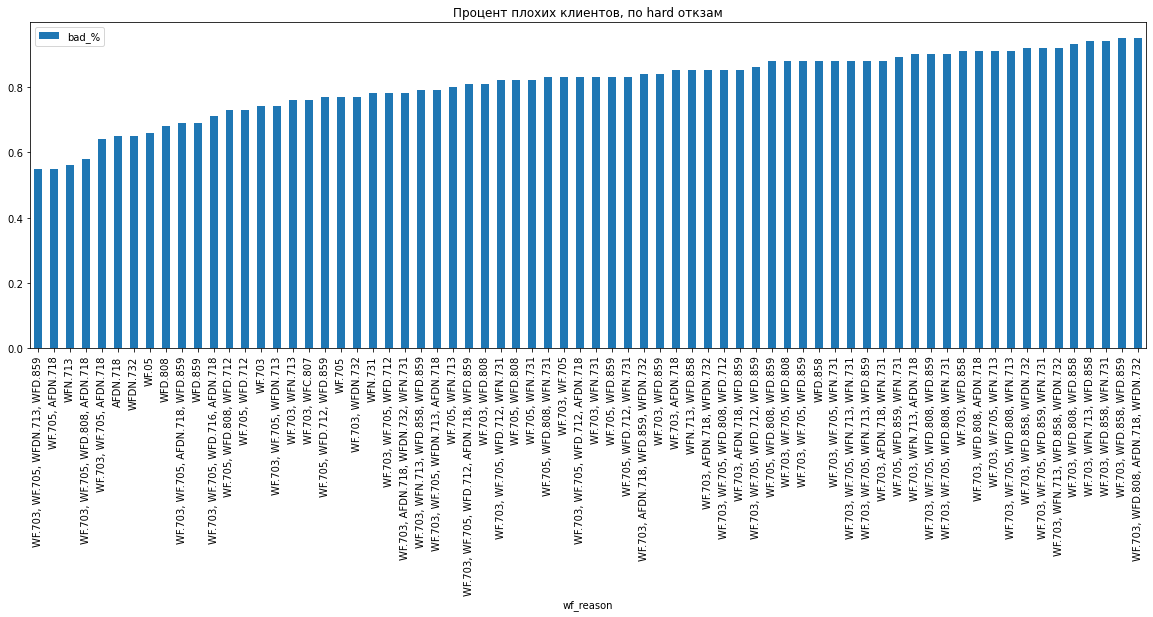

In [161]:
(df6
    .sort_values('bad_%')
    .plot(kind='bar',x='wf_reason',y='bad_%',figsize=(20,6), title='Процент плохих клиентов, по hard откзам')
)